# Install and use environment

In [1]:
import Pkg
Pkg.activate("./env")
Pkg.instantiate()

  Activating project at `~/SCJ/Projekt/SCJ-PredatorPrey/env`


# Setup for GLMakie

In [2]:
include("./predator_prey_generic.jl")
using GLMakie
GLMakie.activate!()
# To view our starting population, we can build an overview plot using [`abmplot`](@ref).
# We define the plotting details for the wolves and sheep:
ashape(a) = a.def.symbol
acolor(a) = a.def.color

# and instruct [`abmplot`](@ref) how to plot grass as a heatmap:
grasscolor(model) = model.growth ./ model.regrowth_time
# and finally define a colormap for the grass:
heatkwargs = (colormap = [:brown, :green], colorrange = (0, 1))

# and put everything together and give it to [`abmplot`](@ref)
return plotkwargs = (;
    agent_color = acolor,
    agent_size = 25,
    agent_marker = ashape,
    agentsplotkwargs = (strokewidth = 1.0, strokecolor = :black),
    heatarray = grasscolor,
    heatkwargs = heatkwargs,
)

(agent_color = acolor, agent_size = 25, agent_marker = ashape, agentsplotkwargs = (strokewidth = 1.0, strokecolor = :black), heatarray = grasscolor, heatkwargs = (colormap = [:brown, :green], colorrange = (0, 1)))

# Select scenario by executing the corresponding cell. Then run the model

# Scenario 1
This has similar functionality to the original model, where animals walk randomly and reproduce by chance

In [3]:
events = []
animal_defs = [
AnimalDefinition(30,'●',RGBAf(1.0, 1.0, 1.0, 1),0, 0, 1, 0.3, 20, 1, "Sheep", ["Wolf","Bear"], ["Grass"])
AnimalDefinition(3,'▲',RGBAf(0.2, 0.2, 0.3, 1),0, 0, 1, 0.07, 20, 1, "Wolf", [], ["Sheep"])
]
stable_params = (;
    events = events,
    animal_defs = animal_defs,
    dims = (30, 30),
    regrowth_time = 30,
    Δenergy_grass = 6,
    seed = 71758,
)

(events = Any[], animal_defs = AnimalDefinition[AnimalDefinition(30, '●', RGBA{Float32}(1.0f0,1.0f0,1.0f0,1.0f0), 0, 0, 1, 0.3, 20.0, 1, "Sheep", ["Wolf", "Bear"], ["Grass"]), AnimalDefinition(3, '▲', RGBA{Float32}(0.2f0,0.2f0,0.3f0,1.0f0), 0, 0, 1, 0.07, 20.0, 1, "Wolf", String[], ["Sheep"])], dims = (30, 30), regrowth_time = 30, Δenergy_grass = 6, seed = 71758)

# Scenario 2
This uses score based movement logic and animals only reproduce when they have enough energy.
This model is more stable. Less prey starves and a similar oscillation to the Lotka-Voltera equations emerges.

In [6]:
events = []
animal_defs = [
AnimalDefinition(30,'●',RGBAf(1.0, 1.0, 1.0, 1),20, 20, 1, 0.3, 20, 3, "Sheep", ["Wolf","Bear"], ["Grass"])
AnimalDefinition(3,'▲',RGBAf(0.2, 0.2, 0.3, 1),20, 20, 1, 0.07, 20, 3, "Wolf", [], ["Sheep"])
]
stable_params = (;
    events = events,
    animal_defs = animal_defs,
    dims = (30, 30),
    regrowth_time = 30,
    Δenergy_grass = 6,
    seed = 71758,
)

(events = Any[], animal_defs = AnimalDefinition[AnimalDefinition(30, '●', RGBA{Float32}(1.0f0,1.0f0,1.0f0,1.0f0), 20, 20, 1, 0.3, 20.0, 3, "Sheep", ["Wolf", "Bear"], ["Grass"]), AnimalDefinition(3, '▲', RGBA{Float32}(0.2f0,0.2f0,0.3f0,1.0f0), 20, 20, 1, 0.07, 20.0, 3, "Wolf", String[], ["Sheep"])], dims = (30, 30), regrowth_time = 30, Δenergy_grass = 6, seed = 71758)

# Scenario 3
This tries to simulate the effects of droughts and floods

In [ ]:
events = RecurringEvent[
RecurringEvent("Drought", 30, 40, 100, 124, 240, 0)
RecurringEvent("Flood", 0.4, 0, 20, 20, 120, 0)
] # -> extreme Populationsschwankungen, Räuber stirbt aus (t=433) und System kollabiert
animal_defs = [
AnimalDefinition(30,'●',RGBAf(1.0, 1.0, 1.0, 1),20, 20, 1, 0.3, 20, 3, "Sheep", ["Wolf","Bear"], ["Grass"])
AnimalDefinition(3,'▲',RGBAf(0.2, 0.2, 0.3, 1),20, 20, 1, 0.07, 20, 3, "Wolf", [], ["Sheep"])
]
stable_params = (;
    events = events,
    animal_defs = animal_defs,
    dims = (30, 30),
    regrowth_time = 30,
    Δenergy_grass = 6,
    seed = 71758,
)

# Scenario 4
This tries to simulate winter seasons.

In [ ]:
events = RecurringEvent[
RecurringEvent("Winter", 0, 0, 18, 24, 24, 0)
RecurringEvent("PreyReproduceSeasonal", 0.5, 0.1, 1, 7, 24, 0)
RecurringEvent("PredatorReproduceSeasonal", 0.1, 0.04, 6, 12, 24, 0)
] # -> geringere max. Population, dafür weniger starke Schwankung.
animal_defs = [
AnimalDefinition(30,'●',RGBAf(1.0, 1.0, 1.0, 1),20, 20, 1, 0.3, 20, 3, "Sheep", ["Wolf","Bear"], ["Grass"])
AnimalDefinition(3,'▲',RGBAf(0.2, 0.2, 0.3, 1),20, 20, 1, 0.07, 20, 3, "Wolf", [], ["Sheep"])
]
stable_params = (;
    events = events,
    animal_defs = animal_defs,
    dims = (30, 30),
    regrowth_time = 30,
    Δenergy_grass = 6,
    seed = 71758,
)

# Scenario 5
This tries to simulate droughts and floods with winter seasons

In [17]:
events = RecurringEvent[
RecurringEvent("Drought", 30, 40, 100, 124, 240, 0)
RecurringEvent("Flood", 0.4, 0, 25, 25, 120, 0)
RecurringEvent("Winter", 0, 0, 18, 24, 24, 0)
RecurringEvent("PreyReproduceSeasonal", 0.5, 0.1, 1, 7, 24, 0)
RecurringEvent("PredatorReproduceSeasonal", 0.1, 0.05, 6, 12, 24, 0)
] # -> starke Schwankung durch, allerdings bleibt das System stabil
animal_defs = [
AnimalDefinition(30,'●',RGBAf(1.0, 1.0, 1.0, 1),20, 20, 1, 0.3, 20, 3, "Sheep", ["Wolf","Bear"], ["Grass"])
AnimalDefinition(3,'▲',RGBAf(0.2, 0.2, 0.3, 1),20, 20, 1, 0.07, 20, 3, "Wolf", [], ["Sheep"])
]
stable_params = (;
    events = events,
    animal_defs = animal_defs,
    dims = (30, 30),
    regrowth_time = 30,
    Δenergy_grass = 6,
    seed = 71758,
)

(events = RecurringEvent[RecurringEvent("Drought", 30.0, 40.0, 100, 124, 240, 0), RecurringEvent("Flood", 0.4, 0.0, 25, 25, 120, 0), RecurringEvent("Winter", 0.0, 0.0, 18, 24, 24, 0), RecurringEvent("PreyReproduceSeasonal", 0.5, 0.1, 1, 7, 24, 0), RecurringEvent("PredatorReproduceSeasonal", 0.1, 0.05, 6, 12, 24, 0)], animal_defs = AnimalDefinition[AnimalDefinition(30, '●', RGBA{Float32}(1.0f0,1.0f0,1.0f0,1.0f0), 20, 20, 1, 0.3, 20.0, 3, "Sheep", ["Wolf", "Bear"], ["Grass"]), AnimalDefinition(3, '▲', RGBA{Float32}(0.2f0,0.2f0,0.3f0,1.0f0), 20, 20, 1, 0.07, 20.0, 3, "Wolf", String[], ["Sheep"])], dims = (30, 30), regrowth_time = 30, Δenergy_grass = 6, seed = 71758)

# Run the Model interactivly

In [5]:
# GLMakie Parameters
model_params_ranges = Dict(
    :regrowth_time => 0:1:100,
    :Δenergy_grass => 0:1:50,
)
animal_params_ranges = generate_animal_parameter_ranges(animal_defs)
params = merge(model_params_ranges,animal_params_ranges)

# Data Collection
sheep(a) = a.def.type == "Sheep"
wolf(a) = a.def.type == "Wolf"
eaten(a) = a.def.type == "Sheep" && a.death_cause == Predation
starved(a) = a.def.type == "Sheep" && a.death_cause == Starvation
count_grass(model) = count(model.fully_grown)
adata = [(sheep, count), (wolf, count), (eaten, count), (starved, count)]
mdata = [count_grass]

# initialize and run
model = initialize_model(;stable_params...)
fig, abmobs = abmexploration(
    model;
    params,
    plotkwargs...,
    adata,
    alabels = ["Sheep", "Wolf", "Eaten", "Starved"],
    mdata, mlabels = ["Grass"]
)
fig

# Just run and plot the data

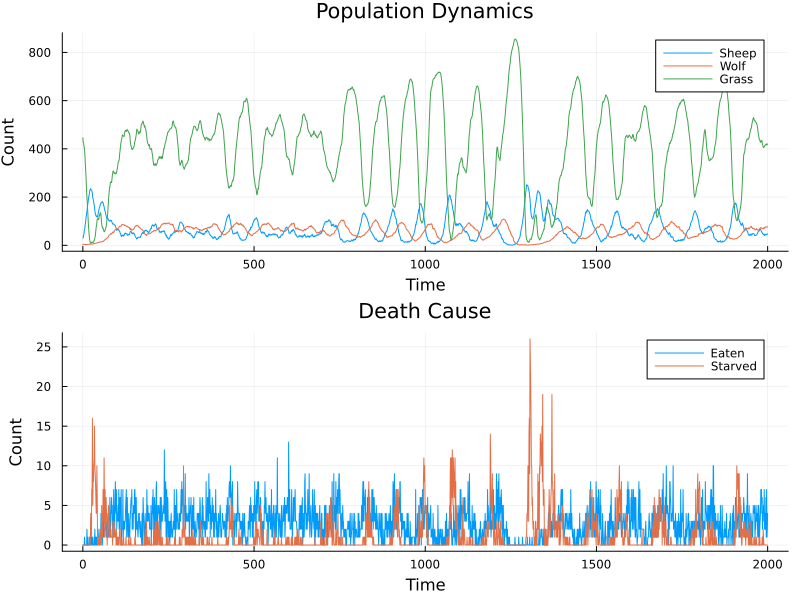

In [19]:
steps = 2000

# GLMakie Parameters
model_params_ranges = Dict(
    :regrowth_time => 0:1:100,
    :Δenergy_grass => 0:1:50,
)
animal_params_ranges = generate_animal_parameter_ranges(animal_defs)
params = merge(model_params_ranges,animal_params_ranges)

# Data Collection
sheep(a) = a.def.type == "Sheep"
wolf(a) = a.def.type == "Wolf"
eaten(a) = a.def.type == "Sheep" && a.death_cause == Predation
starved(a) = a.def.type == "Sheep" && a.death_cause == Starvation
count_grass(model) = count(model.fully_grown)
adata = [(sheep, count), (wolf, count), (eaten, count), (starved, count)]
mdata = [count_grass]

# initialize and run
model = initialize_model(;stable_params...)
df1,df2 = run!(model, steps; adata, mdata)

using DataFrames, Plots

fig = Plots.plot(layout = (2, 1), size = (800, 600), legend = true)
Plots.plot!(fig[1], df1.time, df1.count_sheep, label = "Sheep", linewidth = 1)
Plots.plot!(fig[1], df1.time, df1.count_wolf, label = "Wolf", linewidth = 1)
Plots.plot!(fig[1], df2.time, df2.count_grass, label = "Grass", linewidth = 1)
Plots.plot!(fig[2], df1.time, df1.count_eaten, label = "Eaten", linewidth = 1)
Plots.plot!(fig[2], df1.time, df1.count_starved, label = "Starved", linewidth = 1)

Plots.title!(fig[1], "Population Dynamics")
Plots.xlabel!(fig[1], "Time")
Plots.ylabel!(fig[1], "Count")
Plots.title!(fig[2], "Death Cause")
Plots.xlabel!(fig[2], "Time")
Plots.ylabel!(fig[2], "Count")
display(fig)